In [70]:
# library importation
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import ADASYN

sn.set_theme()

In [71]:
# loading dataset
data = pd.read_csv('tedsd_puf_2019.csv')
data.head()

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2019,20191553576,2,-9,4,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1
1,2019,20191465214,2,-9,3,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
2,2019,20191443889,2,-9,2,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
3,2019,20191409377,2,-9,3,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,3
4,2019,20191479567,2,-9,3,3,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1


In [72]:
data.shape

(1722503, 76)

In [73]:
data.columns

Index(['DISYR', 'CASEID', 'STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'SERVICES',
       'DETCRIM', 'LOS', 'PSOURCE', 'NOPRIOR', 'ARRESTS', 'EMPLOY', 'METHUSE',
       'PSYPROB', 'PREG', 'GENDER', 'VET', 'LIVARAG', 'DAYWAIT', 'SERVICES_D',
       'REASON', 'EMPLOY_D', 'LIVARAG_D', 'ARRESTS_D', 'DSMCRIT', 'AGE',
       'RACE', 'ETHNIC', 'DETNLF', 'DETNLF_D', 'PRIMINC', 'SUB1', 'SUB2',
       'SUB3', 'SUB1_D', 'SUB2_D', 'SUB3_D', 'ROUTE1', 'ROUTE2', 'ROUTE3',
       'FREQ1', 'FREQ2', 'FREQ3', 'FREQ1_D', 'FREQ2_D', 'FREQ3_D', 'FRSTUSE1',
       'FRSTUSE2', 'FRSTUSE3', 'HLTHINS', 'PRIMPAY', 'FREQ_ATND_SELF_HELP',
       'FREQ_ATND_SELF_HELP_D', 'ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG',
       'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG',
       'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG', 'SEDHPFLG', 'INHFLG',
       'OTCFLG', 'OTHERFLG', 'DIVISION', 'REGION', 'IDU', 'ALCDRUG'],
      dtype='object')

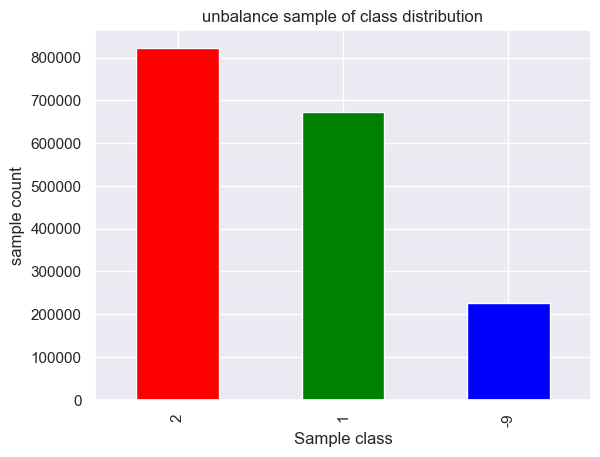

In [74]:
import seaborn as sn

sn.set_style()
data['PSYPROB'].value_counts().plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('unbalance sample of class distribution')
plt.xlabel('Sample class')
plt.ylabel('sample count')
plt.show()

In [76]:
data = data[data['PSYPROB'] != -9]
data.head()

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2019,20191553576,2,-9,4,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1
1,2019,20191465214,2,-9,3,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
2,2019,20191443889,2,-9,2,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
3,2019,20191409377,2,-9,3,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,3
4,2019,20191479567,2,-9,3,3,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1


In [77]:
data = data.reset_index()
data.drop(columns=['index'], inplace=True)
data.head()

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2019,20191553576,2,-9,4,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1
1,2019,20191465214,2,-9,3,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
2,2019,20191443889,2,-9,2,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
3,2019,20191409377,2,-9,3,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,3
4,2019,20191479567,2,-9,3,3,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1


In [78]:
data.shape

(1497128, 76)

In [79]:
data['PSYPROB'].replace({1:0, 2:1}, inplace=True)

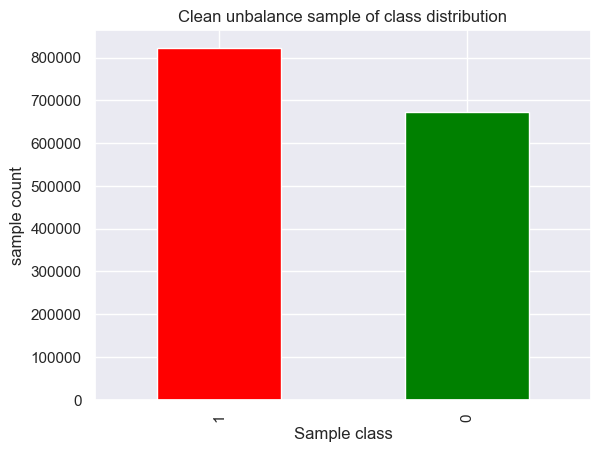

In [80]:
sn.set_style()
data['PSYPROB'].value_counts().plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Clean unbalance sample of class distribution')
plt.xlabel('Sample class')
plt.ylabel('sample count')
plt.show()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497128 entries, 0 to 1497127
Data columns (total 76 columns):
 #   Column                 Non-Null Count    Dtype
---  ------                 --------------    -----
 0   DISYR                  1497128 non-null  int64
 1   CASEID                 1497128 non-null  int64
 2   STFIPS                 1497128 non-null  int64
 3   CBSA2010               1497128 non-null  int64
 4   EDUC                   1497128 non-null  int64
 5   MARSTAT                1497128 non-null  int64
 6   SERVICES               1497128 non-null  int64
 7   DETCRIM                1497128 non-null  int64
 8   LOS                    1497128 non-null  int64
 9   PSOURCE                1497128 non-null  int64
 10  NOPRIOR                1497128 non-null  int64
 11  ARRESTS                1497128 non-null  int64
 12  EMPLOY                 1497128 non-null  int64
 13  METHUSE                1497128 non-null  int64
 14  PSYPROB                1497128 non-null  int64
 15

In [23]:
data['PSYPROB'].unique()

array([0, 1], dtype=int64)

### Data balancing operation

In [25]:
clean_data = data[:100000]
clean_data.sample(2)

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
91859,2019,20191520296,4,-9,-9,-9,7,-9,1,-9,...,0,0,0,0,0,0,8,4,-9,0
28584,2019,20191547183,4,-9,-9,-9,7,-9,1,-9,...,0,0,0,0,0,0,8,4,0,1


In [26]:
data_1  = clean_data      
data_1.replace(-9, np.nan, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_9924\4101082772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.replace(-9, np.nan, inplace=True)


In [27]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split


In [28]:
y = clean_data['PSYPROB']
x = clean_data.drop(columns=['PSYPROB'])
x.shape

(100000, 75)

In [29]:
# Impute NaN with column means
imputer = SimpleImputer(strategy='mean')
df = imputer.fit_transform(x)

In [30]:
df.shape

(100000, 75)

In [33]:
df

array([[2.01900000e+03, 2.01915536e+10, 2.00000000e+00, ...,
        4.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.01900000e+03, 2.01914652e+10, 2.00000000e+00, ...,
        4.00000000e+00, 0.00000000e+00, 3.00000000e+00],
       [2.01900000e+03, 2.01914439e+10, 2.00000000e+00, ...,
        4.00000000e+00, 0.00000000e+00, 3.00000000e+00],
       ...,
       [2.01900000e+03, 2.01916036e+10, 4.00000000e+00, ...,
        4.00000000e+00, 2.13590793e-01, 0.00000000e+00],
       [2.01900000e+03, 2.01914138e+10, 4.00000000e+00, ...,
        4.00000000e+00, 2.13590793e-01, 0.00000000e+00],
       [2.01900000e+03, 2.01916900e+10, 4.00000000e+00, ...,
        4.00000000e+00, 2.13590793e-01, 0.00000000e+00]])

In [46]:
# Standardize and apply PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [47]:
pca = PCA(n_components=30)
final_data = pca.fit_transform(X_scaled)

In [48]:
final_data

array([[-1.82972682, -1.06039238,  2.28756334, ...,  1.41637652,
         0.09341245,  2.46272066],
       [ 0.27201058, -0.70634912,  4.32021144, ...,  0.36220685,
         0.19592472, -0.23942905],
       [ 1.92109577, -2.05346597,  3.68155154, ...,  0.05075625,
         0.23074105,  1.74791835],
       ...,
       [-1.6057891 ,  0.06645582, -0.28317609, ..., -0.20363639,
         0.21574589, -0.40477688],
       [-1.11924742, -0.24899919, -0.33465333, ..., -0.0907504 ,
         0.21122116, -0.59325565],
       [-2.06167179,  0.22769389, -0.17487773, ..., -0.15708899,
         0.31242011, -0.35898832]])

#### data sampling techniques SMOTE, SMOTEENN, and ADASYN

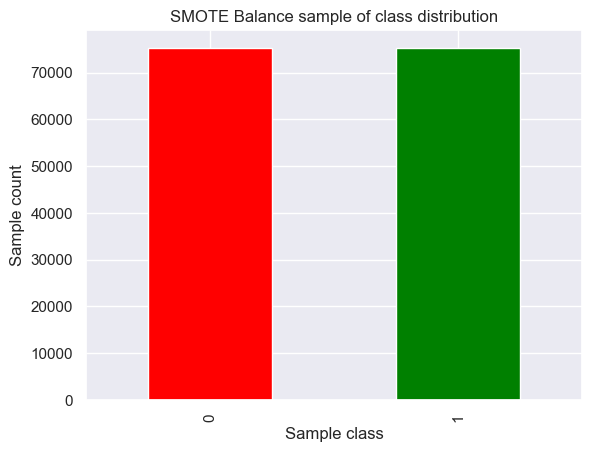

In [49]:
# Apply SMOTE to training data
smote = SMOTE()
X_smote_resampled, y_smote_resampled = smote.fit_resample(final_data, y)

y_smote_resampled.value_counts().plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('SMOTE Balance sample of class distribution')
plt.xlabel('Sample class')
plt.ylabel('Sample count')
plt.show()

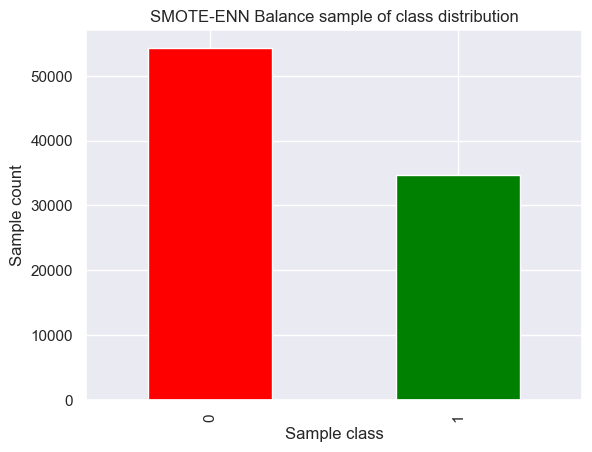

In [52]:
smote_enn = SMOTEENN()
X_smoteenn_resampled, y_smoteenn_resampled = smote_enn.fit_resample(final_data, y)

# Plotting the class distribution after SMOTE-ENN resampling
y_smoteenn_resampled.value_counts().plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('SMOTE-ENN Balance sample of class distribution')
plt.xlabel('Sample class')
plt.ylabel('Sample count')
plt.show()

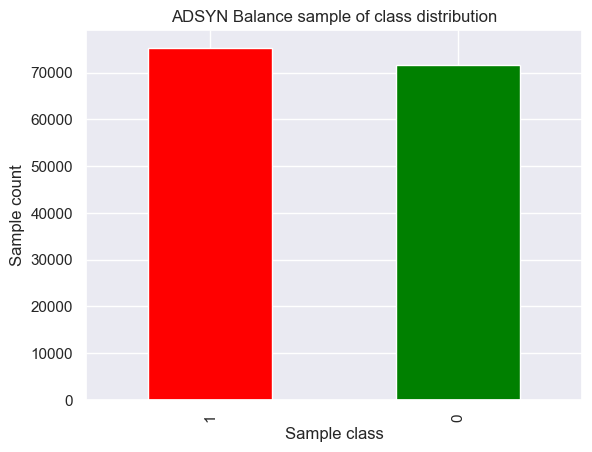

In [53]:
# Apply ADASYN to training data
ada = ADASYN(random_state=42)
X_adsyn_res, y_adsyn_res = ada.fit_resample(final_data,y)

y_adsyn_res.value_counts().plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('ADSYN Balance sample of class distribution')
plt.xlabel('Sample class')
plt.ylabel('Sample count')
plt.show()

In [ ]:
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, stratify=y_smote_resampled, random_state=42)
X_adsyn_train, X_adsyn_test, y_adsyn_train, y_adysn_test = train_test_split(X_adsyn_res, y_adsyn_res, test_size=0.2, stratify=y_adsyn_res, random_state=42)

In [57]:
X_adsyn_train.shape

(117641, 30)

In [56]:
X_smote_train.shape

(120553, 30)

In [ ]:
X_smoteenn_train, X_smoteenn_test, y_smoteenn_train, y_smoteenn_test = train_test_split(X_smoteenn_resampled, y_smoteenn_resampled, test_size=0.2, stratify=y_smoteenn_resampled, random_state=42)

In [58]:
X_smoteenn_train.shape

(71299, 30)

In [59]:
# Build model with SMOTE BALANCED DATA
model = Sequential([
    Dense(128, activation='relu', input_shape=(30,)),  
    Dense(64, activation='relu'),  
    Dense(32, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

# Compile
model.compile(
    optimizer='SGD',
    loss='binary_crossentropy',  
    metrics=['accuracy']
)

# Train
history = model.fit(
    X_smote_train, y_smote_train,
    epochs=7,
    validation_data=(X_smote_test, y_smote_test)
)

Epoch 1/7
3768/3768 [==============================] - 39s 9ms/step - loss: 0.6659 - accuracy: 0.5886 - val_loss: 0.6524 - val_accuracy: 0.6115
Epoch 2/7
3768/3768 [==============================] - 24s 6ms/step - loss: 0.6455 - accuracy: 0.6190 - val_loss: 0.6413 - val_accuracy: 0.6232
Epoch 3/7
3768/3768 [==============================] - 23s 6ms/step - loss: 0.6356 - accuracy: 0.6304 - val_loss: 0.6356 - val_accuracy: 0.6316
Epoch 4/7
3768/3768 [==============================] - 22s 6ms/step - loss: 0.6278 - accuracy: 0.6392 - val_loss: 0.6290 - val_accuracy: 0.6401
Epoch 5/7
3768/3768 [==============================] - 28s 7ms/step - loss: 0.6211 - accuracy: 0.6474 - val_loss: 0.6255 - val_accuracy: 0.6450
Epoch 6/7
3768/3768 [==============================] - 23s 6ms/step - loss: 0.6154 - accuracy: 0.6523 - val_loss: 0.6247 - val_accuracy: 0.6436
Epoch 7/7
3768/3768 [==============================] - 30s 8ms/step - loss: 0.6101 - accuracy: 0.6580 - val_loss: 0.6193 - val_accuracy:

<Axes: >

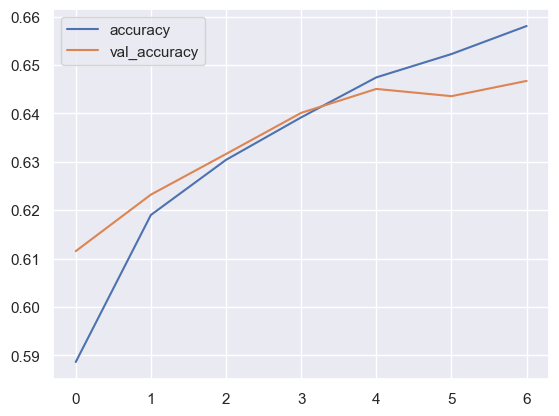

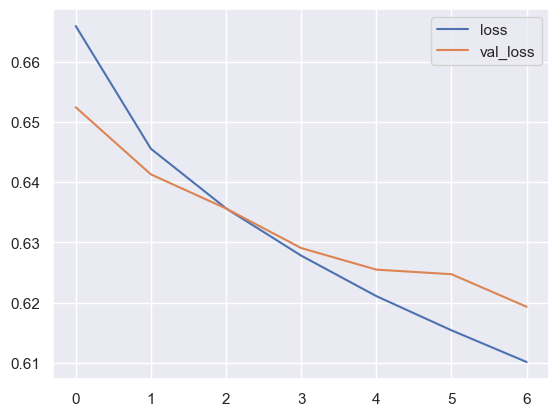

In [60]:
import pandas as pd
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

In [66]:
# Build model with ADYSN BALANCED DATA
model = Sequential([
    Dense(128, activation='relu', input_shape=(30,)),  
    Dense(64, activation='relu'),  
    Dense(32, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

# Compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  
    metrics=['accuracy']
)

# X_adsyn_train, X_adsyn_test, y_adsyn_train, y_adysn_test 
# Train
history = model.fit(
    X_adsyn_train, y_adsyn_train,
    epochs=7,
    validation_data=(X_adsyn_test, y_adysn_test)
)

Epoch 1/7
3677/3677 [==============================] - 20s 5ms/step - loss: 0.6610 - accuracy: 0.5991 - val_loss: 0.6538 - val_accuracy: 0.6071
Epoch 2/7
3677/3677 [==============================] - 16s 4ms/step - loss: 0.6413 - accuracy: 0.6243 - val_loss: 0.6375 - val_accuracy: 0.6284
Epoch 3/7
3677/3677 [==============================] - 16s 4ms/step - loss: 0.6292 - accuracy: 0.6368 - val_loss: 0.6302 - val_accuracy: 0.6334
Epoch 4/7
3677/3677 [==============================] - 16s 4ms/step - loss: 0.6200 - accuracy: 0.6456 - val_loss: 0.6238 - val_accuracy: 0.6393
Epoch 5/7
3677/3677 [==============================] - 16s 4ms/step - loss: 0.6112 - accuracy: 0.6543 - val_loss: 0.6215 - val_accuracy: 0.6478
Epoch 6/7
3677/3677 [==============================] - 16s 4ms/step - loss: 0.6032 - accuracy: 0.6601 - val_loss: 0.6146 - val_accuracy: 0.6509
Epoch 7/7
3677/3677 [==============================] - 16s 4ms/step - loss: 0.5953 - accuracy: 0.6657 - val_loss: 0.6134 - val_accuracy:

In [ ]:
# Build model with ADYSN BALANCED DATA
model = Sequential([
    Dense(128, activation='relu', input_shape=(30,)),  
    Dense(64, activation='relu'),  
    Dense(32, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

# Compile
model.compile(
    optimizer='SGD',
    loss='binary_crossentropy',  
    metrics=['accuracy']
)

# X_adsyn_train, X_adsyn_test, y_adsyn_train, y_adysn_test 
# Train
history = model.fit(
    X_adsyn_train, y_adsyn_train,
    epochs=7,
    validation_data=(X_adsyn_test, y_adysn_test)

In [68]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
import seaborn as sn 

In [69]:
param_grids = {
    'RF': {
        'n_estimators': [10, 50],
        'max_depth': [None, 10,],
        # 'min_samples_split': [2, 5, 10],
        # 'min_samples_leaf': [1, 2, 4]
    },
    'GB': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        # 'max_depth': [3, 5]
    },
    'DNN': {
        'hidden_layer_sizes': [(50,), (100,)],
        'activation': ['tanh', 'relu'],
        # 'solver': ['sgd', 'adam'],
        # 'learning_rate': ['constant', 'adaptive']
    },
    'KNN': {
        'n_neighbors': [3, 5],
        'weights': ['uniform', 'distance'],
        # 'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'SGD': {
        'loss': ['hinge', 'log'],
        'penalty': ['l2', 'l1'],
        # 'alpha': [0.0001, 0.001, 0.01],
        # 'learning_rate': ['constant', 'optimal', 'invscaling']
    }
}

models = {
    'RF': RandomForestClassifier(),
    'GB': GradientBoostingClassifier(),
    'DNN': MLPClassifier(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SGD': SGDClassifier()
}

# Step 3: Perform Randomized Search
best_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    search = RandomizedSearchCV(
        model,
        param_distributions=param_grids[name],
        n_iter=20,  # Number of parameter settings sampled
        scoring='accuracy',
        cv=3,
        random_state=42,
        verbose=1,
        n_jobs=-1
    )
    
    search.fit(X_adsyn_train, y_adsyn_train)
    best_models[name] = search.best_estimator_
    print(f"Best parameters for {name}: {search.best_params_}\n")

# Step 4: Evaluate Best Models
for name, model in best_models.items():
    y_pred = model.predict(X_adsyn_test)
    acc = accuracy_score(y_adysn_test, y_pred)
    print(f"Accuracy for {name}: {acc:.4f}")

Training RF...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for RF: {'n_estimators': 50, 'max_depth': None}

Training GB...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for GB: {'n_estimators': 100, 'learning_rate': 0.1}

Training DNN...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for DNN: {'hidden_layer_sizes': (100,), 'activation': 'tanh'}

Training KNN...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 3}

Training SGD...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Best parameters for SGD: {'penalty': 'l2', 'loss': 'log'}

Accuracy for RF: 0.8111
Accuracy for GB: 0.6012
Accuracy for DNN: 0.6490
Accuracy for KNN: 0.7828
Accuracy for SGD: 0.5467


training Score 0.7905875
                  0
accuracy   0.763100
precision  0.765865
recall     0.987458
              precision    recall  f1-score   support

           0       0.67      0.08      0.14      4931
           1       0.77      0.99      0.86     15069

    accuracy                           0.76     20000
   macro avg       0.72      0.53      0.50     20000
weighted avg       0.74      0.76      0.68     20000



<Axes: >

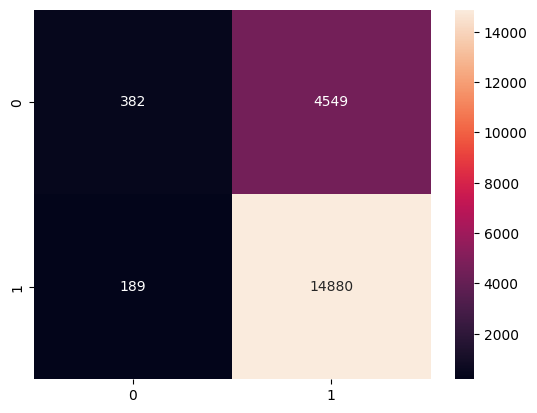

In [101]:
# training indivicual model 


rf = RandomForestClassifier(n_estimators=50, max_depth=10)
rf.fit(X_train, y_train)
print(f'training Score {rf.score(X_train, y_train)}')

rf_pred = rf.predict(X_test)
# print(rf_pred)
report = classification_report(y_test, rf_pred)
acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)
# f1_score = f1_score(y_test, rf_pred)
matrix = confusion_matrix(y_test, rf_pred)


rf_metric = {
    'accuracy': acc,
    'precision':pre, 
    'recall': recall
    # 'f1-score': f1_score
}

print(pd.DataFrame(pd.Series(rf_metric)))
print(report)
sn.heatmap(matrix, annot=True, fmt='d')

training Score 0.76795
                  0
accuracy   0.762550
precision  0.767330
recall     0.982879
              precision    recall  f1-score   support

           0       0.67      0.08      0.14      4931
           1       0.77      0.99      0.86     15069

    accuracy                           0.76     20000
   macro avg       0.72      0.53      0.50     20000
weighted avg       0.74      0.76      0.68     20000



<Axes: >

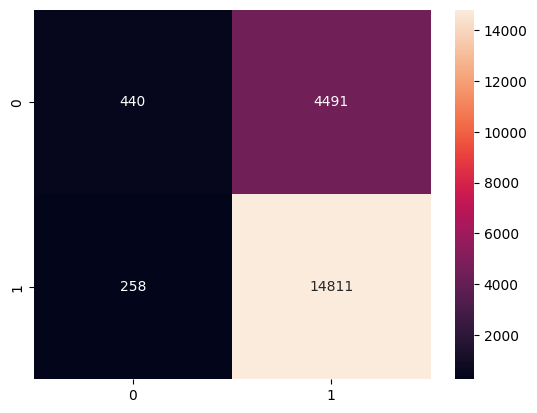

In [103]:
# training indivicual model 


gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gb.fit(X_train, y_train)
print(f'training Score {gb.score(X_train, y_train)}')

gb_pred = gb.predict(X_test)
# print(rf_pred)
report = classification_report(y_test, rf_pred)
acc = accuracy_score(y_test, gb_pred)
pre = precision_score(y_test, gb_pred)
recall = recall_score(y_test, gb_pred)
# f1_score = f1_score(y_test, rf_pred)
matrix = confusion_matrix(y_test, gb_pred)


gb_metric = {
    'accuracy': acc,
    'precision':pre, 
    'recall': recall
    # 'f1-score': f1_score
}

print(pd.DataFrame(pd.Series(gb_metric)))
print(report)
sn.heatmap(matrix, annot=True, fmt='d')

training Score 0.79905
                  0
accuracy   0.751900
precision  0.784528
recall     0.924680
              precision    recall  f1-score   support

           0       0.49      0.22      0.31      4931
           1       0.78      0.92      0.85     15069

    accuracy                           0.75     20000
   macro avg       0.64      0.57      0.58     20000
weighted avg       0.71      0.75      0.72     20000



<Axes: >

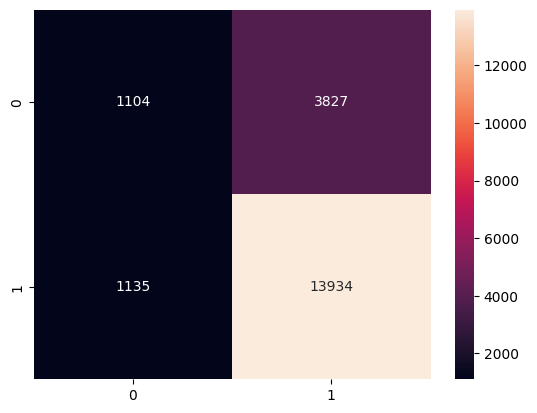

In [108]:
# training indivicual model 


knn = KNeighborsClassifier(n_neighbors=7, p=1, weights='uniform')
knn.fit(X_train, y_train)
print(f'training Score {knn.score(X_train, y_train)}')

knn_pred = knn.predict(X_test)
# print(rf_pred)
report = classification_report(y_test, knn_pred)
acc = accuracy_score(y_test, knn_pred)
pre = precision_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred)
# f1_score = f1_score(y_test, rf_pred)
matrix = confusion_matrix(y_test, knn_pred)


knn_metric = {
    'accuracy': acc,
    'precision':pre, 
    'recall': recall
    # 'f1-score': f1_score
}

print(pd.DataFrame(pd.Series(knn_metric)))
print(report)
sn.heatmap(matrix, annot=True, fmt='d')

training Score 0.7526375
                  0
accuracy   0.754200
precision  0.756765
recall     0.992899
              precision    recall  f1-score   support

           0       0.53      0.02      0.05      4931
           1       0.76      0.99      0.86     15069

    accuracy                           0.75     20000
   macro avg       0.64      0.51      0.45     20000
weighted avg       0.70      0.75      0.66     20000



<Axes: >

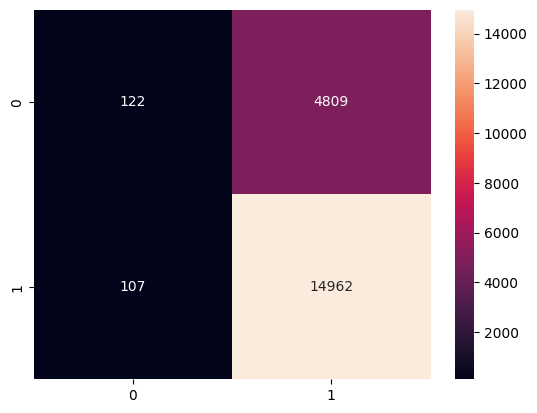

In [112]:
# training indivicual model 


sgd = SGDClassifier(loss='hinge', penalty='l1')
sgd.fit(X_train, y_train)
print(f'training Score {sgd.score(X_train, y_train)}')

sgd_pred = sgd.predict(X_test)
# print(rf_pred)
report = classification_report(y_test, sgd_pred)
acc = accuracy_score(y_test, sgd_pred)
pre = precision_score(y_test, sgd_pred)
recall = recall_score(y_test, sgd_pred)
# f1_score = f1_score(y_test, rf_pred)
matrix = confusion_matrix(y_test, sgd_pred)


sgd_metric = {
    'accuracy': acc,
    'precision':pre, 
    'recall': recall
    # 'f1-score': f1_score
}

print(pd.DataFrame(pd.Series(sgd_metric)))
print(report)
sn.heatmap(matrix, annot=True, fmt='d')

training Score 0.78015
                  0
accuracy   0.769200
precision  0.780377
recall     0.965359
              precision    recall  f1-score   support

           0       0.53      0.02      0.05      4931
           1       0.76      0.99      0.86     15069

    accuracy                           0.75     20000
   macro avg       0.64      0.51      0.45     20000
weighted avg       0.70      0.75      0.66     20000



<Axes: >

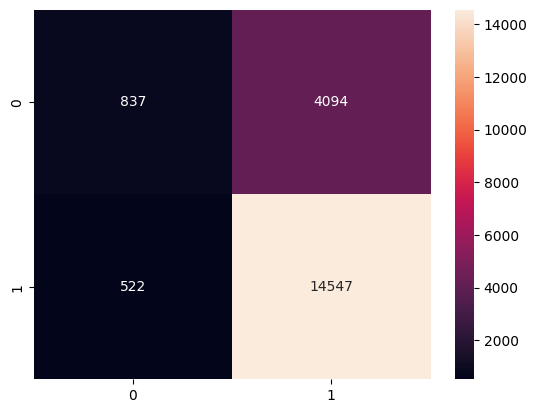

In [113]:
# training indivicual model 


mlp = MLPClassifier(hidden_layer_sizes=(50,), activation='relu')
mlp.fit(X_train, y_train)
print(f'training Score {mlp.score(X_train, y_train)}')

mlp_pred = mlp.predict(X_test)
# print(rf_pred)
report = classification_report(y_test, sgd_pred)
acc = accuracy_score(y_test, mlp_pred)
pre = precision_score(y_test, mlp_pred)
recall = recall_score(y_test, mlp_pred)
# f1_score = f1_score(y_test, rf_pred)
matrix = confusion_matrix(y_test, mlp_pred)


mlp_metric = {
    'accuracy': acc,
    'precision':pre, 
    'recall': recall
    # 'f1-score': f1_score
}

print(pd.DataFrame(pd.Series(mlp_metric)))
print(report)
sn.heatmap(matrix, annot=True, fmt='d')